In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from PIL import Image
from sklearn.metrics import f1_score


#Exploring the hyperspectral
## Download the Berlin dataset to your folder

### Load the HSI data

In [9]:

# Define the folder path and file name
folder_path = 'HS-SAR Berlin'

os.chdir(folder_path)

# Load the .mat file
mat_data = scipy.io.loadmat('data_HS_LR.mat')
print(mat_data.keys())
HSI_data = mat_data['data_HS_LR']

dict_keys(['__header__', '__version__', '__globals__', 'data_HS_LR'])


In [10]:
HSI_data= HSI_data.astype(np.float32)

In [11]:
HSI_data.dtype

dtype('float32')

##  Load train and test labels

In [12]:
# Load the .mat file
mat_data = scipy.io.loadmat('TrainImage.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
train_label= mat_data['TrainImage']

dict_keys(['__header__', '__version__', '__globals__', 'TrainImage'])


In [13]:
train_label.dtype

dtype('uint8')

In [14]:
# Load the .mat file
mat_data = scipy.io.loadmat('TestImage.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
test_label = mat_data['TestImage']

dict_keys(['__header__', '__version__', '__globals__', 'TestImage'])


## HSI data has 244 bands with spatial size 1723by476

In [15]:
HSI_data.shape

(1723, 476, 244)

check unique elements

## Set color palette for segmentation

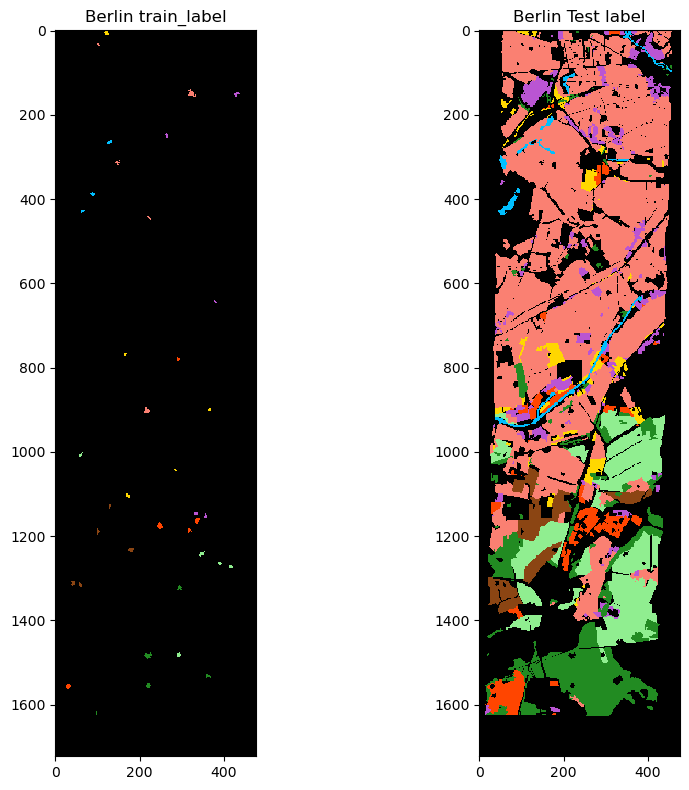

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


palette = [
    (0, 0, 0),         # Black for background
    (34, 139, 34),     # Dark Green for Forest (#228B22)
    (250, 128, 114),   # Salmon for Residential Area (#FA8072)
    (255, 69, 0),      # OrangeRed for Industrial Area (#FF4500)
    (144, 238, 144),   # Light Green for Low Plants (#90EE90)
    (139, 69, 19),     # Saddle Brown for Soil (#8B4513)
    (255, 215, 0),     # Yellow for Allotment (#FFD700)
    (186, 85, 211),    # Medium Orchid for Commercial Area (#BA55D3)
    (0, 191, 255)      # Deep Sky Blue for Water (#00BFFF)
]


# Normalize the RGB values to be between 0 and 1
custom_palette = [(r / 255.0, g / 255.0, b / 255.0) for r, g, b in palette]

# Create the colormap using the artistic colors
cmap  = mcolors.ListedColormap(custom_palette)


# plot the train label and test label with color palette
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Plot data on each subplot
# First subplot
axs[0].imshow(train_label, cmap = cmap, interpolation='nearest')
axs[0].set_title('Berlin train_label')

# Second subplot
axs[1].imshow(test_label,cmap = cmap,interpolation='nearest' )  # Example plot data
axs[1].set_title('Berlin Test label')

plt.tight_layout()
plt.show()

## Visualize the legend

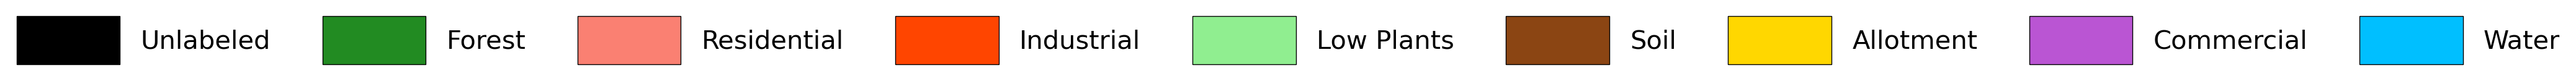

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the colors and labels for the legend
legend_elements = [
    Patch(facecolor='#000000', edgecolor='black', label='Unlabeled'),  # Black for background
    Patch(facecolor='#228B22', edgecolor='black', label='Forest'),      # Dark Green for Forest
    Patch(facecolor='#FA8072', edgecolor='black', label='Residential'),  # Salmon for Residential Area
    Patch(facecolor='#FF4500', edgecolor='black', label='Industrial'),   # OrangeRed for Industrial Area
    Patch(facecolor='#90EE90', edgecolor='black', label='Low Plants'),        # Light Green for Low Plants
    Patch(facecolor='#8B4513', edgecolor='black', label='Soil'),              # Saddle Brown for Soil
    Patch(facecolor='#FFD700', edgecolor='black', label='Allotment'),         # Yellow for Allotment
    Patch(facecolor='#BA55D3', edgecolor='black', label='Commercial'),   # Medium Orchid for Commercial Area
    Patch(facecolor='#00BFFF', edgecolor='black', label='Water')              # Deep Sky Blue for Water
]

fig, ax = plt.subplots(figsize=(10, 0.5))

ax.legend(handles=legend_elements, loc='center', fontsize=30, frameon=False, ncol=len(legend_elements),handleheight=2.5, handlelength=4, bbox_to_anchor=(0.5, -0.1), bbox_transform=fig.transFigure)

# Remove the axes
ax.axis('off')
# Remove the border
plt.gca().set_frame_on(False)

# Save the legend as an image
plt.savefig('legend_horizontal_7_15.pdf', format='pdf', bbox_inches='tight')
# Display the plot
plt.show()

# Check train and test labels

In [18]:
def check_unique_elements(input_array):
  unique_elements, counts = np.unique(input_array, return_counts=True)
  # Print the counts of each unique element
  for element, count in zip(unique_elements, counts):
    print("Element:", int(element), "Count:", count)


In [19]:
check_unique_elements(train_label)


Element: 0 Count: 817328
Element: 1 Count: 443
Element: 2 Count: 423
Element: 3 Count: 499
Element: 4 Count: 376
Element: 5 Count: 331
Element: 6 Count: 280
Element: 7 Count: 298
Element: 8 Count: 170


In [20]:
check_unique_elements(test_label)

Element: 0 Count: 358297
Element: 1 Count: 54511
Element: 2 Count: 268219
Element: 3 Count: 19067
Element: 4 Count: 58906
Element: 5 Count: 17095
Element: 6 Count: 13025
Element: 7 Count: 24526
Element: 8 Count: 6502


## Show RGB color image ,assuming Red the 40 channel, Green is the 30 th channel, and Blue is the 15th channel

600nm rband 34th , 550 16th nm green band, 450 blue bands 5th, try th combination of

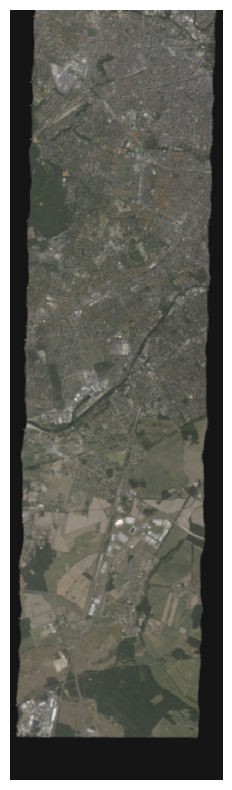

In [21]:
# Extract the RGB channels
red = HSI_data[:, :, 40]  #  Red
green = HSI_data[:, :,30]  #  Green
blue = HSI_data[:, :,15]  #  Blue

# Stack the single channels together to make an RGB image
rgb_image = np.stack((red, green, blue), axis=-1)


# Normalize the image data to 0-1 for floating point or 0-255 for uint8
rgb_image_normalized = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))
if rgb_image.dtype == np.uint8:
    rgb_image_normalized = (rgb_image_normalized * 255).astype(np.uint8)
gamma_coeff = 0.4
gamma_corrected= np.power(rgb_image_normalized, gamma_coeff)  # Apply gamma correction
#rgb_image_normalized = rgb_image / np.max(rgb_image)

#plt.imshow(rgb_image_normalized)
plt.figure(figsize=(10, 10))
plt.imshow(gamma_corrected)
plt.axis('off')
# save rgb image
plt.savefig('RGB.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [22]:
rgb_patch_normalized_pil = (gamma_corrected * 255).astype(np.uint8)  # Scale to 0-255

img = Image.fromarray(rgb_patch_normalized_pil)

In [23]:
img.size

(476, 1723)

# Divide hyperspectal image cubes  and its label with overlapping

## create folder Berlin_benchmark_train_data_32
## train data is stored under this folder

In [24]:

current_dir = os.getcwd()
print(current_dir)
folder_name = 'Berlin_benchmark_train_data_32'
# Construct the path
Berlin_64_train_data_32= os.path.join(current_dir, folder_name)
os.makedirs(Berlin_64_train_data_32, exist_ok=True)
print(Berlin_64_train_data_32) #save divided hyperspectral cube data and rgb patches into traiinng folder

D:\one_pixel_two_features\HS-SAR Berlin
D:\one_pixel_two_features\HS-SAR Berlin\Berlin_benchmark_train_data_32


## create foder Berlin_benchmark_test_data_32
## test data patches is stored under this folder

In [25]:
current_dir = os.getcwd()
print(current_dir)

folder_name = 'Berlin_benchmark_test_data_32'
# Construct the path
Berlin_64_test_data_32 = os.path.join(current_dir, folder_name)
os.makedirs(Berlin_64_test_data_32, exist_ok=True)
print(Berlin_64_test_data_32) #save divided patches into folder "hyperspectral_traninning_64"

D:\one_pixel_two_features\HS-SAR Berlin
D:\one_pixel_two_features\HS-SAR Berlin\Berlin_benchmark_test_data_32


# divide Berlin hyperspectral big rgb image into 64by64 patches with overlapping 32
original width: 476 ,
original height : 1723,
adjusted width :480 ,
adjusted height : 1728,

*alltother divided into 742 patches*

In [26]:
import pdb
def divide_into_patches_with_reflect_padding(image, label, train_data_244,output_folder ,patch_size=64, overlap=32):

    stride = patch_size - overlap
    original_width, original_height = image.size
    # Calculate necessary padding to fit stride

    adjusted_width =((original_width - patch_size) // stride + 1) * stride + patch_size
    adjusted_height = ((original_height - patch_size) // stride + 1) * stride + patch_size

    print(f"original_width : {original_width}, original height: {original_height}")
    print(f"adjusted_width: {adjusted_width} , adjusted_height: {adjusted_height}")

    padded_horizontal = adjusted_width- original_width
    padded_vertical= adjusted_height- original_height

    padded_image = Image.new("RGB", (adjusted_width, adjusted_height), (0, 0, 0))

    # Paste the original image onto the padded image with the desired offset
    padded_image.paste(image, (padded_horizontal, padded_vertical))
    padded_image = np.array(padded_image)

    padded_label = np.pad(label, ((padded_vertical, 0), (padded_horizontal, 0)),mode='constant', constant_values=0)

    #setting pad_width for train_data cube data
    pad_width = ((0, 0),  # No padding for the first dimension
             (padded_vertical,0),  # Add 3 rows at the end of the second dimension
             (padded_horizontal, 0)) # Add 15 columns at the end of the third dimension

    padded_train_data= np.pad(train_data_244,pad_width,mode='constant', constant_values=0)


    patch_number = 0

    # Generate patches
    for i in range(0, padded_image.shape[0] - patch_size + 1, stride):
        for j in range(0, padded_image.shape[1] - patch_size + 1, stride):
            patch_img = padded_image[i:i + patch_size, j:j + patch_size]
            patch_label = padded_label[i:i + patch_size, j:j + patch_size]
            patch_train_data = padded_train_data[:,i:i + patch_size, j:j + patch_size]

            # Format the filename with leading zeros and a unique patch number
            filename_img = f"{output_folder}/hyperspectral{patch_number}.png"
            filename_label = f"{output_folder}/hyperspectral{patch_number}.npy"
            filename_train_data = f"{output_folder}/hyperspectral{patch_number}.npz"

            patch_img = Image.fromarray(patch_img)
            patch_img.save(filename_img)
            np.save(filename_label,patch_label)
            np.savez(filename_train_data,arr1= patch_train_data)
            patch_number += 1

    return patch_number



**pay attention** In the UH dataset, the first dimension is band channels while in Berlin dataset the third dimension is band channels

In [28]:
hsi_data = HSI_data.transpose(2,0,1) # swith channels

In [29]:
hsi_data.shape

(244, 1723, 476)

## divide for train set and test set

save train data to Berlin_64_train_data_32

In [27]:
Berlin_64_train_data_32

'D:\\one_pixel_two_features\\HS-SAR Berlin\\Berlin_benchmark_train_data_32'

In [30]:
train_label.shape

(1723, 476)

In [31]:
patches_num = divide_into_patches_with_reflect_padding(img,train_label,hsi_data, Berlin_64_train_data_32, 64, 32)

print("Number of patches:", patches_num)

original_width : 476, original height: 1723
adjusted_width: 480 , adjusted_height: 1728
Number of patches: 742


In [32]:
patches_num = divide_into_patches_with_reflect_padding(img,test_label,hsi_data, Berlin_64_test_data_32, 64, 32)

print("Number of patches:", patches_num)

original_width : 476, original height: 1723
adjusted_width: 480 , adjusted_height: 1728
Number of patches: 742
